In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import talib as ta

### Import stock data of TATA Motors

In [2]:
symbol = 'TATAMOTORS.NS'
start = '2020-01-01'
end = '2021-01-01'

# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,185.149994,186.699997,183.600006,184.449997,184.449997,25968357
2020-01-02,185.000000,194.699997,184.600006,193.750000,193.750000,57289863
2020-01-03,192.899994,195.649994,189.250000,191.100006,191.100006,47572728
2020-01-06,191.000000,191.000000,185.050003,185.649994,185.649994,28621212
2020-01-07,187.000000,189.399994,182.300003,184.699997,184.699997,34995035


In [3]:
def VWAP(df):
    return (df['Adj Close'] * df['Volume']).sum() / df['Volume'].sum()

In [4]:
n = 14
df['VWAP'] = pd.concat([(pd.Series(VWAP(df.iloc[i:i+n]), index=[df.index[i+n]])) for i in range(len(df)-n)])

In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,VWAP
Date,,,,,,,
2020-01-21,195.500000,196.399994,190.199997,191.399994,191.399994,20859400,192.852870
2020-01-22,191.949997,192.500000,184.250000,185.600006,185.600006,32952072,193.231367
2020-01-23,186.750000,190.399994,183.800003,188.399994,188.399994,33032086,192.635777
2020-01-24,188.000000,191.000000,185.000000,186.500000,186.500000,21791825,192.489665
2020-01-27,185.699997,186.899994,180.850006,182.199997,182.199997,30132428,192.634393


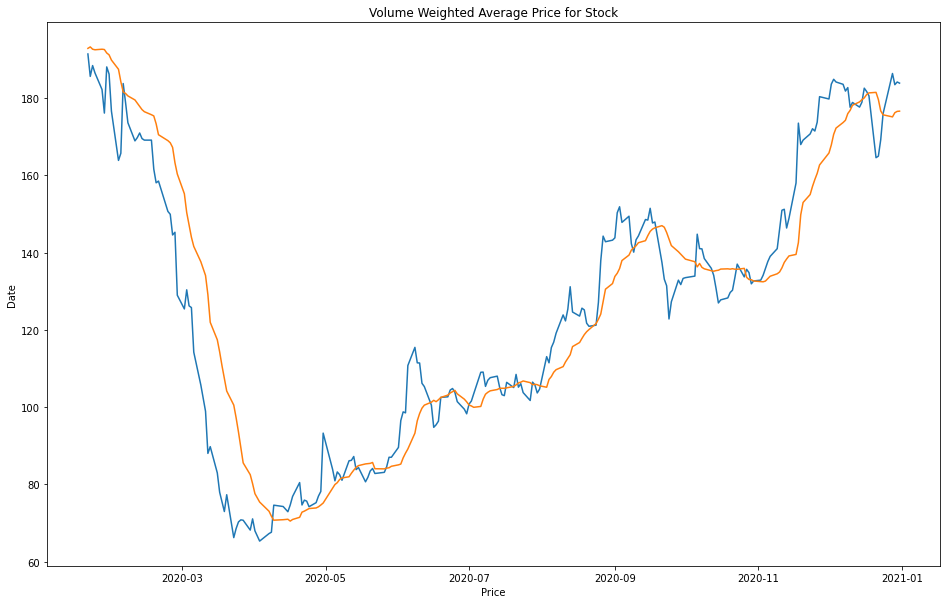

In [6]:
plt.figure(figsize=(16,10))
plt.plot(df['Adj Close'])
plt.plot(df['VWAP'])
plt.title('Volume Weighted Average Price for Stock')
plt.xlabel('Price')
plt.ylabel('Date')
plt.show()